In [7]:
#SURF
!pip install mahotas

     ---------------------------------------- 1.7/1.7 MB 482.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import mahotas
import mahotas.demos
import mahotas as mh
import numpy as np
import cv2 as cv
from pylab import imshow, show
from mahotas.features import surf
from PIL import Image

In [2]:
f = mh.imread('dataset/taj.jpg', as_grey=True)
f = f.astype(np.uint8)
spoints = surf.surf(f)
print("Nr points:", len(spoints))

Nr points: 199


In [12]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
values = km.fit_predict(spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

In [13]:
img2 = surf.show_surf(f, spoints, values, colors)

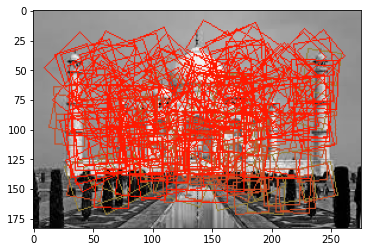

In [14]:
imshow(img2)

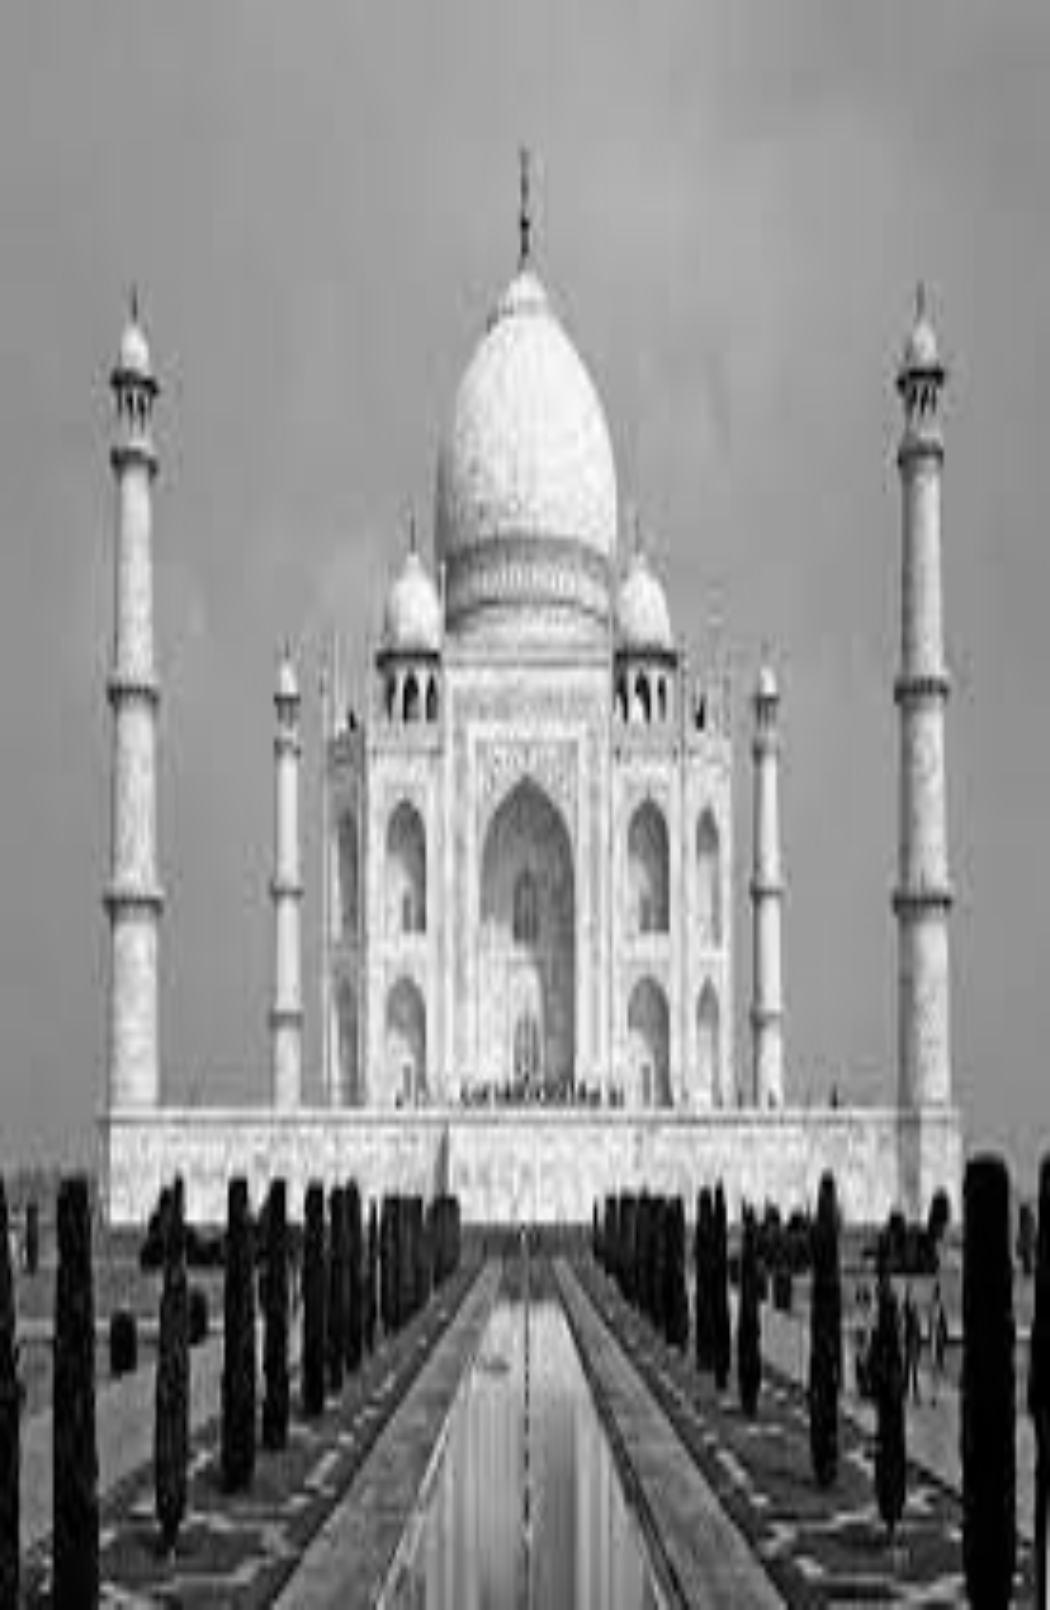

In [22]:
#Scaling 
scaled_image = cv.resize(f, (1050, 1610))
Image.fromarray(scaled_image)

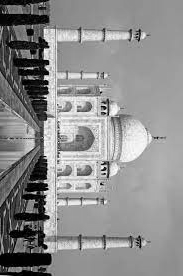

In [24]:
#rotated image
rotated_image = cv.rotate(f, cv.ROTATE_90_CLOCKWISE)
Image.fromarray(rotated_image)

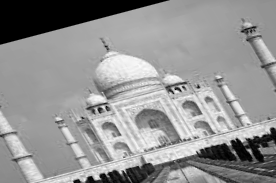

In [26]:
#affine transformation
rows, cols = f.shape
pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])
 
pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])
M = cv.getAffineTransform(pts1, pts2)
affine_image = cv.warpAffine(f, M, (cols, rows))
Image.fromarray(affine_image) 

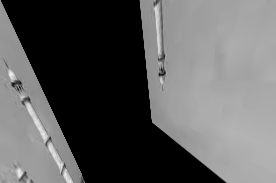

In [28]:
#Perspective transformation
rows, cols = f.shape
pts1 = np.float32([[0,0],
                   [50, 50],
                   [200, 50],
                   [50, 200]])
 
pts2 = np.float32([[0,0],
                   [10, 100],
                   [200, 50],
                   [100, 250]])
P = cv.getPerspectiveTransform(pts1, pts2)
perspective_image = cv.warpPerspective(f, P, (cols, rows))
Image.fromarray(perspective_image)

In [29]:
scaled_spoints = surf.surf(scaled_image)
print("Nr points:", len(scaled_spoints))

Nr points: 997


In [35]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
scaled_values = km.fit_predict(scaled_spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

In [30]:
rotated_spoints = surf.surf(rotated_image)
print("Nr points:", len(rotated_spoints))

Nr points: 195


In [36]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
rotated_values = km.fit_predict(rotated_spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

In [31]:
affine_spoints = surf.surf(affine_image)
print("Nr points:", len(affine_spoints))

Nr points: 165


In [37]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
affine_values = km.fit_predict(affine_spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

In [34]:
perspective_spoints = surf.surf(perspective_image)
print("Nr points:", len(perspective_spoints))

Nr points: 88


In [38]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
perspective_values = km.fit_predict(perspective_spoints)
colors = np.array([(255-52*i,25+52*i,37**i % 101) for i in range(5)])

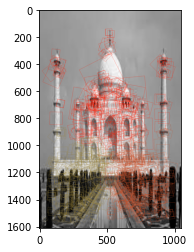

In [39]:
img_scaled = surf.show_surf(scaled_image, scaled_spoints, scaled_values, colors)
imshow(img_scaled)

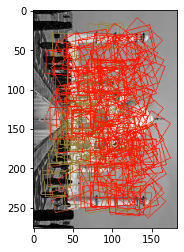

In [40]:
img_rotated = surf.show_surf(rotated_image, rotated_spoints, rotated_values, colors)
imshow(img_rotated)

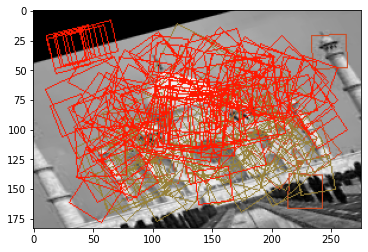

In [41]:
img_affine = surf.show_surf(affine_image, affine_spoints, affine_values, colors)
imshow(img_affine)

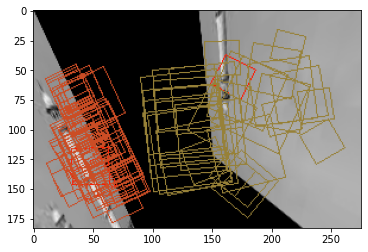

In [42]:
img_perspective = surf.show_surf(perspective_image, perspective_spoints, perspective_values, colors)
imshow(img_perspective)

In [ ]:
#reference https://mahotas.readthedocs.io/en/latest/surf.html